In [3]:
import numpy as np
import matplotlib.pyplot as plt

import networkx as nx

In [4]:
my_graph = nx.Graph([(1,2), (2,3), (3,1)])
my_graph.add_node(4)
my_graph.add_nodes_from([5,6])
my_graph.add_edge(5,6)
print("graph: ", my_graph)
print("nodes: ", my_graph.nodes)
print("edges: ", my_graph.edges)

graph:  Graph with 6 nodes and 4 edges
nodes:  [1, 2, 3, 4, 5, 6]
edges:  [(1, 2), (1, 3), (2, 3), (5, 6)]


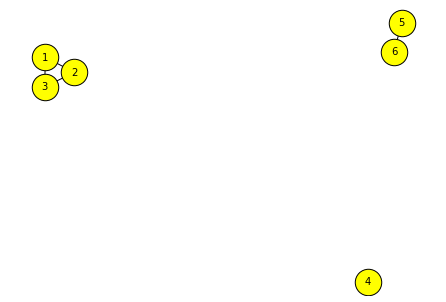

In [5]:
draw_options = {
    "font_size": 10,
    "node_size": 700,
    "node_color": "yellow",
    "edgecolors": "black",
    "linewidths": 1,
    "width": 1,
    "with_labels": True
}
nx.draw(my_graph, **draw_options)

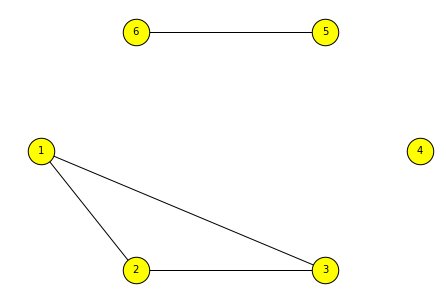

In [6]:
nx.draw_shell(my_graph, **draw_options)

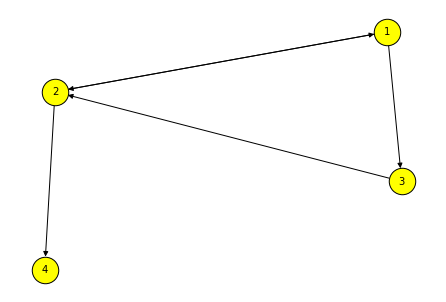

In [7]:
my_graph = nx.DiGraph()
my_graph.add_edges_from([(2, 1), (1, 3), (2, 4), (1, 2), (3, 2)])
nx.draw(my_graph,  **draw_options)


In [8]:
# Neighbors and degrees:

print(list(my_graph.neighbors(1))) 
print(my_graph.out_degree[1])  # the number of edges exiting 1
print(my_graph.in_degree[1])   # the number of edges entering 1
print(my_graph.degree[1])      # the number of edges incident to 1

[3, 2]
2
1
3


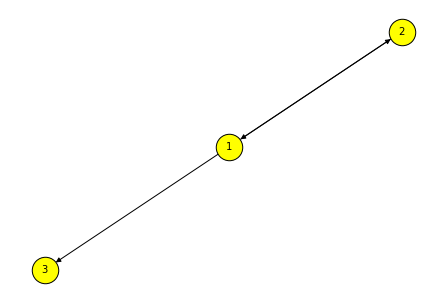

In [9]:

my_graph.remove_node(4)
my_graph.remove_edge(3, 2)
nx.draw(my_graph, **draw_options)

### Draw a weighted graph

In [10]:
def draw_weighted_graph(G, **draw_options):
    pos = nx.spring_layout(G)
    nx.draw(G, pos, **draw_options)
    nx.draw_networkx_edge_labels(G, pos, edge_labels={edge: G.get_edge_data(*edge)['weight'] for edge in G.edges})
                                #  nx.get_edge_attributes(G,'weight'))

def draw_weighted_graph_shell(G, **draw_options):
    pos = nx.shell_layout(G)
    nx.draw(G, pos, **draw_options)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=nx.get_edge_attributes(G,'weight'))

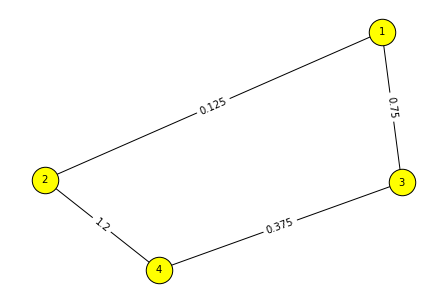

In [11]:
FG = nx.Graph()
FG.add_weighted_edges_from([(1, 2, 0.125), (1, 3, 0.75), (2, 4, 1.2), (3, 4, 0.375)])
draw_weighted_graph(FG, **draw_options)

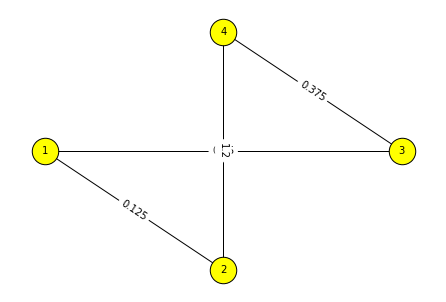

In [12]:
draw_weighted_graph_shell(FG, **draw_options)

## Generate random graph

G graph:
node1 = 0, node2 = 2 , weight = 72
node1 = 0, node2 = 3 , weight = 13
node1 = 0, node2 = 4 , weight = 44
node1 = 0, node2 = 5 , weight = 83
node1 = 0, node2 = 6 , weight = 13
node1 = 0, node2 = 7 , weight = 40
node1 = 0, node2 = 8 , weight = 8
node1 = 0, node2 = 9 , weight = 10
node1 = 1, node2 = 2 , weight = 40
node1 = 1, node2 = 3 , weight = 12
node1 = 1, node2 = 4 , weight = 47
node1 = 1, node2 = 5 , weight = 39
node1 = 1, node2 = 6 , weight = 48
node1 = 1, node2 = 7 , weight = 56
node1 = 1, node2 = 8 , weight = 84
node1 = 1, node2 = 9 , weight = 10
node1 = 2, node2 = 4 , weight = 12
node1 = 2, node2 = 5 , weight = 26
node1 = 2, node2 = 7 , weight = 71
node1 = 2, node2 = 8 , weight = 97
node1 = 2, node2 = 9 , weight = 62
node1 = 3, node2 = 4 , weight = 27
node1 = 3, node2 = 5 , weight = 5
node1 = 3, node2 = 6 , weight = 64
node1 = 3, node2 = 7 , weight = 6
node1 = 3, node2 = 8 , weight = 24
node1 = 4, node2 = 5 , weight = 51
node1 = 4, node2 = 8 , weight = 52
node1 = 4, nod

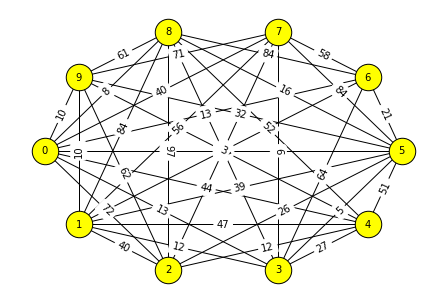

In [13]:
def print_graph(G):
    for u,v,attr in G.edges.data('weight'):
        print(f'node1 = {u}, node2 = {v} , weight = {attr}')

def random_weighted_graph(num_of_nodes, probability_of_edge):
    G = nx.gnp_random_graph(num_of_nodes, probability_of_edge)  
    for (u, v) in G.edges():
        G.edges[u,v]['weight'] = np.random.randint(1,100)
    return G

my_graph = random_weighted_graph(10,0.7)
print("G graph:"); print_graph(my_graph)
draw_weighted_graph_shell(my_graph,  **draw_options)



H graph:
node1 = 1, node2 = 2 , weight = 94
node1 = 1, node2 = 7 , weight = 32
node1 = 1, node2 = 8 , weight = 71
node1 = 1, node2 = 9 , weight = 85
node1 = 2, node2 = 3 , weight = 24
node1 = 3, node2 = 9 , weight = 40
node1 = 4, node2 = 6 , weight = 40
node1 = 4, node2 = 7 , weight = 5
node1 = 6, node2 = 7 , weight = 67
node1 = 6, node2 = 8 , weight = 41
node1 = 6, node2 = 9 , weight = 89
node1 = 7, node2 = 9 , weight = 92


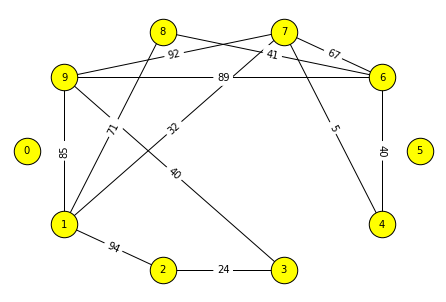

In [14]:
H = random_weighted_graph(10, 0.3)  # create graph with 10 nodes; probability of each edge is 0.3
print("\nH graph:")
print_graph(H)
draw_weighted_graph_shell(H,  **draw_options)

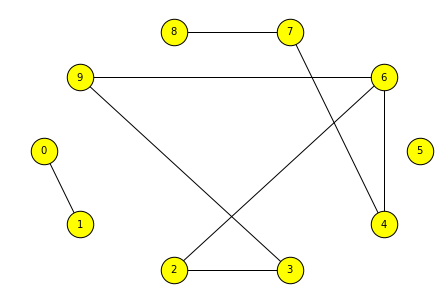

In [15]:
GC = nx.complement(my_graph)  # every non-edge becomes an edge and vice-versa
draw_weighted_graph_shell(GC,  **draw_options)

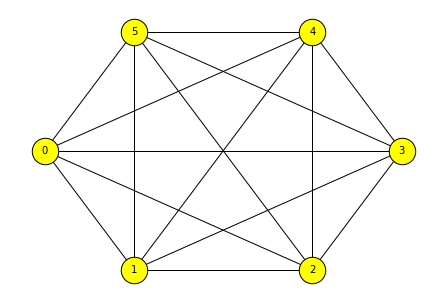

In [16]:
K_6 = nx.complete_graph(6)                  # Returns the complete graph K_n with n nodes.
nx.draw_shell(K_6,  **draw_options)

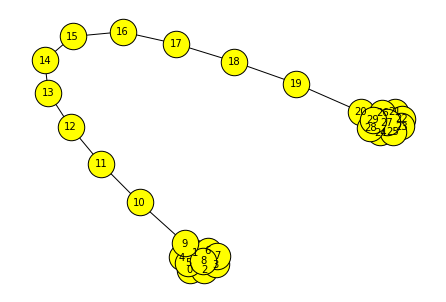

In [17]:
barbell = nx.barbell_graph(10, 10)          # Returns the Barbell Graph: two complete graphs connected by a path.
nx.draw(barbell,  **draw_options)

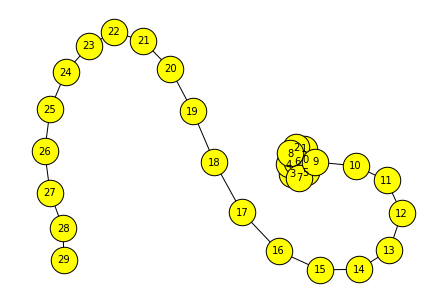

In [18]:

lollipop = nx.lollipop_graph(10, 20)        # Returns the Lollipop Graph; K_m connected to P_n.
nx.draw(lollipop,  **draw_options)

## Graph algorithms

~~~shortest path from 0 to 1~~~
[0, 1]


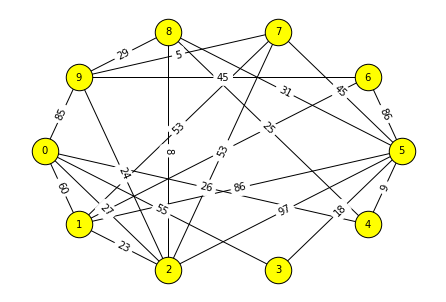

In [19]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# shortest paths and path lengths between nodes in the graph.
# These algorithms work with undirected and directed graphs
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
my_graph = random_weighted_graph(10,0.5)
draw_weighted_graph_shell(my_graph, **draw_options)
print('~~~shortest path from 0 to 1~~~')
if nx.has_path(my_graph, 0, 1):
    print(nx.shortest_path(my_graph, 0, 1)) 
else:
    print("No path!")

In [20]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# Shortest path algorithms for weighted graphs.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
print('\n~~~weighted graph~~~')
# Dijkstra:
print("smallest-weight path from 0 to 1: ", nx.dijkstra_path(my_graph, 0, 1))  # returns a single path (a list)
print(nx.dijkstra_predecessor_and_distance(my_graph, 0)) # returns a dict mapping each node to the previous node in shortest path from 0

# Floyd Warshall
print(nx.floyd_warshall_numpy(my_graph)) # returns a numpy array containing all pairwise distances



~~~weighted graph~~~
smallest-weight path from 0 to 1:  [0, 2, 1]
({0: [], 1: [2], 2: [0], 3: [5], 4: [0], 9: [2], 5: [4], 8: [2], 7: [9], 6: [1]}, {0: 0, 4: 26, 2: 27, 5: 35, 8: 35, 1: 50, 9: 51, 3: 53, 7: 56, 6: 65})
[[ 0. 50. 27. 53. 26. 35. 65. 56. 35. 51.]
 [50.  0. 23. 80. 56. 62. 15. 52. 31. 47.]
 [27. 23.  0. 57. 33. 39. 38. 29.  8. 24.]
 [53. 80. 57.  0. 27. 18. 95. 63. 49. 68.]
 [26. 56. 33. 27.  0.  9. 71. 54. 25. 54.]
 [35. 62. 39. 18.  9.  0. 77. 45. 31. 50.]
 [65. 15. 38. 95. 71. 77.  0. 50. 46. 45.]
 [56. 52. 29. 63. 54. 45. 50.  0. 34.  5.]
 [35. 31.  8. 49. 25. 31. 46. 34.  0. 29.]
 [51. 47. 24. 68. 54. 50. 45.  5. 29.  0.]]


{(9, 6), (0, 3), (1, 7), (4, 8), (5, 2)}


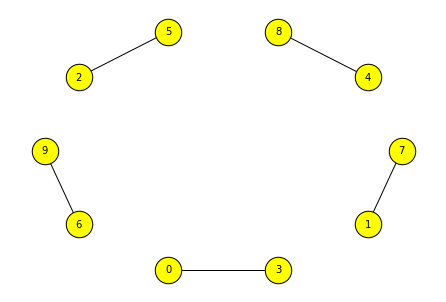

In [21]:
max_weight_matching = nx.max_weight_matching(my_graph)
print(max_weight_matching)
nx.draw_shell(nx.Graph(max_weight_matching) , **draw_options)

## Finding cycles

[(0, 4), (4, 1), (1, 6), (6, 0)]


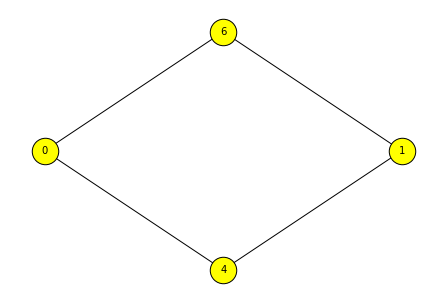

In [37]:
cycle = nx.find_cycle(my_graph)
print(cycle)
nx.draw_shell(nx.Graph(cycle), **draw_options)

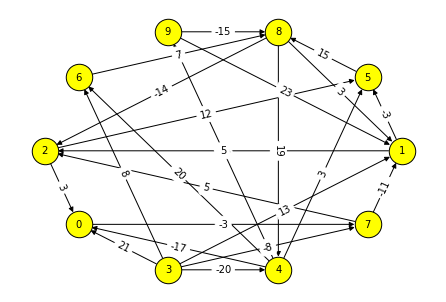

Negative cycle =  [2, 0, 7, 1, 5, 8, 2]


In [59]:
def random_weighted_digraph_with_negative_weights(num_of_nodes, probability_of_edge):
    G = nx.DiGraph()
    for u in range(num_of_nodes):
        for v in range(u+1,num_of_nodes):
            if np.random.random() <= probability_of_edge:
                u_to_v = np.random.random() <= 0.5
                weight = np.random.randint(-20,30)
                if u_to_v:
                    G.add_edge(u,v, weight = weight)
                else:
                    G.add_edge(v,u, weight = weight)
    return G

G = random_weighted_digraph_with_negative_weights(10,0.5)
draw_weighted_graph_shell(G, **draw_options)
plt.show()
try:
    cycle = nx.find_negative_cycle(G, 0)  # Start the search at node 0 (arbitrary)
    print("Negative cycle = ",cycle)    
except nx.NetworkXError as err:
    print(err)

## Bipartite graphs

There is no "bipartite graph" class in networkx; there are functions that treat a standard networkx.Graph as a bipartite graph.

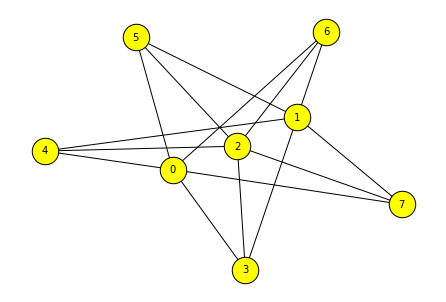

In [21]:
K_3_5 = nx.complete_bipartite_graph(3, 5)   # Returns the complete bipartite graph with sides of size 3 and 5.
nx.draw(K_3_5,  **draw_options)

left_nodes {0, 1, 2} right_nodes {3, 4, 5, 6, 7}


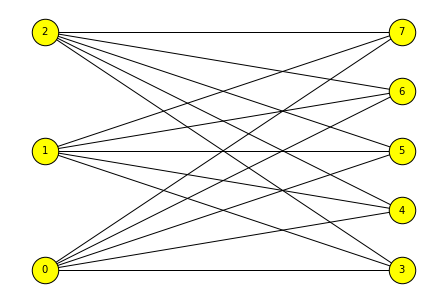

In [22]:
left_nodes, right_nodes = nx.bipartite.sets(K_3_5)
print("left_nodes",left_nodes,"right_nodes",right_nodes)
nx.draw(K_3_5,  **draw_options, pos=nx.bipartite_layout(K_3_5, left_nodes))


But there is a catch: how can the system know what are the two parts?

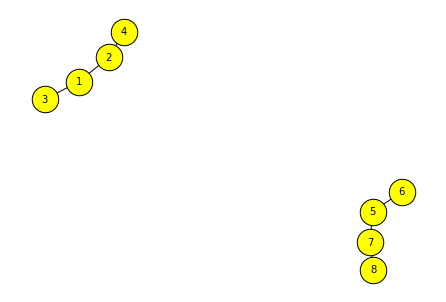

In [23]:
my_graph = nx.Graph([(1,2),(1,3),(4,2), (5,6),(5,7),(8,7)])
nx.draw(my_graph,  **draw_options)

In [ ]:

left_nodes, right_nodes = nx.bipartite.sets(my_graph) # Error: AmbiguousSolution
nx.draw(my_graph,  **draw_options, pos=nx.bipartite_layout(my_graph, left_nodes))  

AmbiguousSolution: Disconnected graph: Ambiguous solution for bipartite sets.

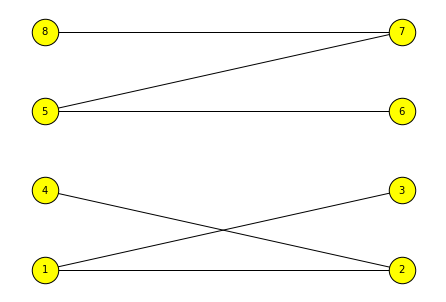

In [ ]:
# left_nodes, right_nodes = nx.bipartite.sets(G) # Error: AmbiguousSolution
left_nodes, right_nodes = [ [1,4,5,8], [2,3,6,7] ] 
nx.draw(my_graph,  **draw_options, pos=nx.bipartite_layout(my_graph, left_nodes))

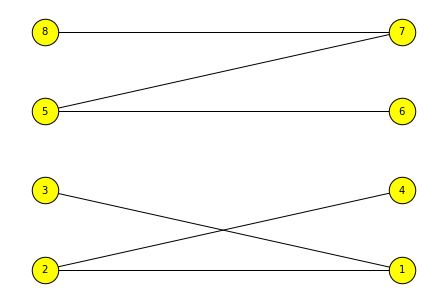

In [25]:

left_nodes, right_nodes = [ [2,3,5,8], [1,4,6,7] ] 
nx.draw(my_graph,  **draw_options, pos=nx.bipartite_layout(my_graph, left_nodes))

{0: 3, 1: 4, 2: 5, 3: 0, 4: 1, 5: 2}


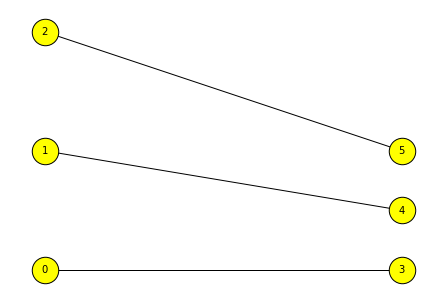

In [26]:
max_matching = nx.bipartite.maximum_matching(K_3_5)
print(max_matching)
left_nodes, right_nodes = nx.bipartite.sets(K_3_5)
nx.draw(nx.Graph(max_matching.items()),  **draw_options, pos=nx.bipartite_layout(K_3_5, left_nodes))

In [ ]:
max_matching = nx.bipartite.maximum_matching(my_graph) # Error: AmbiguousSolution

AmbiguousSolution: Disconnected graph: Ambiguous solution for bipartite sets.

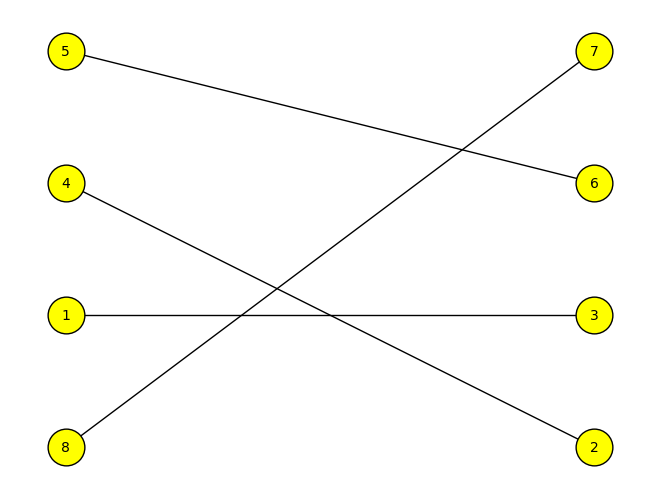

In [ ]:
left_nodes = [1,4,5,8]
max_matching = nx.bipartite.maximum_matching(my_graph, left_nodes) 
nx.draw(nx.Graph(max_matching.items()),  **draw_options, pos=nx.bipartite_layout(my_graph,left_nodes))

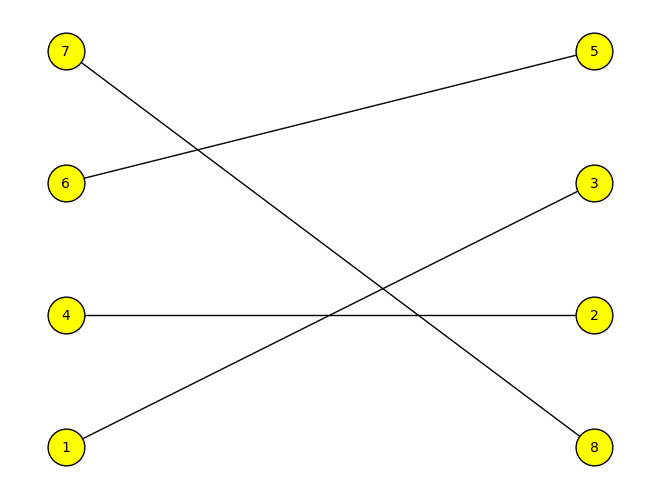

In [ ]:
left_nodes = [1,4,6,7]
max_matching = nx.bipartite.maximum_matching(my_graph, left_nodes) 
nx.draw(nx.Graph(max_matching.items()),  **draw_options, pos=nx.bipartite_layout(my_graph,left_nodes))

### Bipartite graph with weights

In [27]:
for e in my_graph.edges:
	weight = np.random.randint(1,100)
	print(e, weight)
	my_graph[e[0]][e[1]]["weight"]=my_graph[e[1]][e[0]]["weight"]=weight

(1, 2) 67
(1, 3) 30
(2, 4) 71
(5, 6) 19
(5, 7) 56
(7, 8) 6


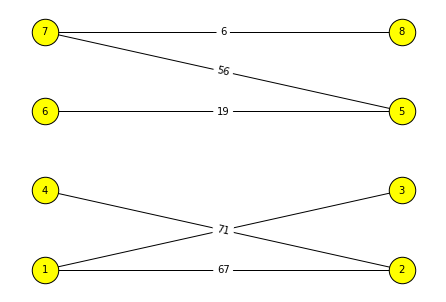

In [28]:
left_nodes = [1,4,6,7]
pos = nx.bipartite_layout(my_graph, left_nodes)
nx.draw(my_graph,  **draw_options, pos=pos)
nx.draw_networkx_edge_labels(my_graph, pos, edge_labels=nx.get_edge_attributes(my_graph,'weight'));

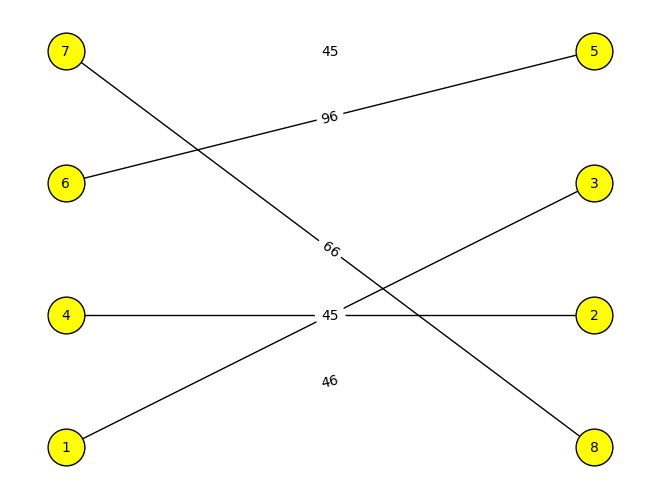

In [ ]:
max_weight_matching = nx.max_weight_matching(my_graph) 
max_weight_matching_graph = nx.Graph(max_weight_matching)
nx.draw(max_weight_matching_graph,  **draw_options, pos=pos)
nx.draw_networkx_edge_labels(max_weight_matching_graph, pos, edge_labels=nx.get_edge_attributes(my_graph,'weight'));

## Reductions

Original graph:


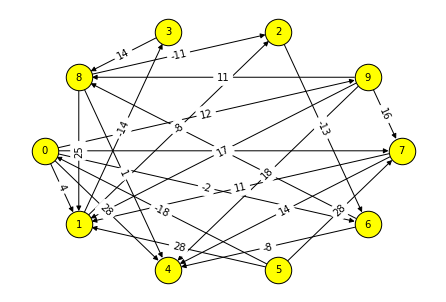

Inverted graph:


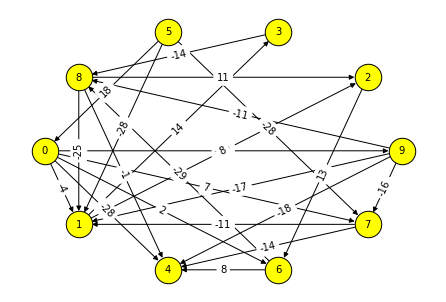

Positive cycle =  [8, 1, 3, 8]


In [69]:
# How to find cycle with a *positive* weight?
G = random_weighted_digraph_with_negative_weights(10,0.5)
print("Original graph:")
draw_weighted_graph_shell(G, **draw_options)
plt.show()

G_inv = nx.DiGraph([(u,v,{"weight":-G.edges[u,v]["weight"]}) for (u,v) in G.edges])
print("Inverted graph:")
draw_weighted_graph_shell(G_inv, **draw_options)
plt.show()

try:
    cycle = nx.find_negative_cycle(G_inv, 0, 
        # weight = lambda u,v,_:-G[u,v]['weight'] if (u,v) in G.edges else 0
        ) 
    print("Positive cycle = ",cycle)    
except nx.NetworkXError as err:
    print(err)

In [72]:
# Shorter version - using a lambda function:
try:
    cycle = nx.find_negative_cycle(G, 0,
        weight = lambda u,v,_:-G.edges[u,v]['weight'] if (u,v) in G.edges else None
        )
    print("Positive cycle = ",cycle)
except nx.NetworkXError as err:
    print(err)

Positive cycle =  [8, 1, 3, 8]


In [ ]:
# How to find a cycle with product at most 1?

[(0, 23), (0, 28), (0, 29), (0, 22), (0, 20), (0, 26), (0, 21), (0, 25), (1, 22), (1, 21), (1, 27), (1, 26), (1, 20), (1, 29), (1, 24), (2, 28), (2, 20), (2, 29), (3, 25), (3, 21), (3, 27), (3, 28), (3, 23), (3, 29), (3, 22), (4, 20), (4, 22), (4, 25), (5, 29), (5, 25), (5, 22), (5, 28), (6, 26), (6, 25), (6, 20), (6, 21), (6, 28), (7, 22), (7, 21), (7, 20), (7, 28), (7, 25), (7, 26), (8, 20), (8, 29), (8, 22), (9, 22), (9, 24), (9, 21), (10, 26), (10, 24), (10, 25), (10, 20), (10, 28), (10, 29), (11, 25), (11, 22), (11, 24), (11, 29), (11, 23), (11, 27), (11, 26), (12, 25), (12, 26), (12, 22), (12, 27), (12, 20), (13, 26), (13, 29), (13, 20), (13, 27), (13, 25), (13, 23), (13, 28), (14, 20), (14, 26), (14, 28), (14, 23), (15, 21), (15, 29), (15, 27), (15, 24), (15, 22), (15, 26), (16, 23), (16, 27), (16, 22), (16, 25), (16, 21), (17, 28), (17, 26), (17, 25), (17, 27), (18, 22), (18, 26), (18, 20), (19, 26), (19, 20), (19, 24), (19, 25)]


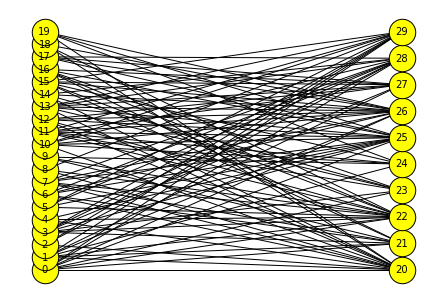

In [93]:
n=20
m=10
G = nx.bipartite.gnmk_random_graph(n=n,m=m,k=100)   # Returns a random bipartite graph with 20+10 nodes and 100 edges
left_nodes = range(n)
print(G.edges)
nx.draw(G,  **draw_options, pos=nx.bipartite_layout(G,left_nodes))

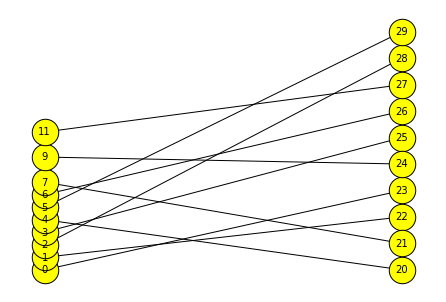

In [95]:
# Maximum matching:
matching = nx.bipartite.maximum_matching(G)
nx.draw(nx.Graph(matching.items()),  **draw_options, pos=nx.bipartite_layout(G,left_nodes))

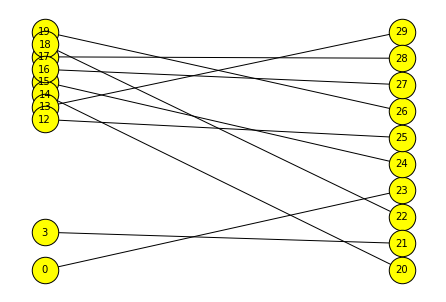

In [102]:
# Maximum priority matching - give priority to some left nodes:
priority_nodes = [3, 12, 18]

# This does not work with max_weight_matching:
# matching = nx.max_weight_matching(G,
#     weight = lambda u,v,data: n if u in priority_nodes else 1
#     )

Gw = nx.Graph([(u,v,{"weight":n if u in priority_nodes else 1}) for (u,v) in G.edges])
# print("Weighted graph:")
# draw_weighted_graph_shell(Gw, **draw_options)
# plt.show()
matching = nx.max_weight_matching(Gw)

nx.draw(nx.Graph(matching),  **draw_options, pos=nx.bipartite_layout(G,left_nodes))

In [ ]:
# How to compute an allocation in which each person receives exactly 3 items?